In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from numpy.linalg import eig, det
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualizations
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16 , 12
pylab.rcParams['axes.titlesize'] = 18
pylab.rcParams['axes.labelsize'] = 14
pylab.rcParams['xtick.labelsize'] = 12
pylab.rcParams['ytick.labelsize'] = 12
pylab.rcParams['legend.fontsize'] = 12
sns.set_style('ticks')
palette = ["#1E88E5", "#43A047", "#e53935", "#5E35B1", "#FFB300", "#00ACC1", "#3949AB", "#F4511E"]
sns.set_palette(palette)

In [2]:
def trp_eqs(v, u_R, r=10.0):
    """
    Define parameter and ODE's describing the trp operon
    x = x[0] : mRNA conc
    y = x[1] : enzyme conc
    z = x[2] : trp conc
    """
    x = v[0]
    y = v[1]
    z = v[2]
    
    # Constants
    a_1 = 0.9
    a_2 = 0.02
    a_3 = 0.0
    a_4 = 0.024
    a_5 = 430.0
    a_6 = -7.5
    k = 0.005
    T = 0.0156
    k_i = 2283.0
    u_m = 0.0312
    u = u_R * u_m
    
    # ODE's
    dx = (z+1)/(1+(1+r)*z) - (a_1 + u)*x
    dy = x - (a_2+u)*y
    dz = y*((k_i**2)/((k_i**2)+(z**2))) - (a_3 + u)*z - a_4*(z/(z+1)) - a_5*(1+a_6*u)*u*(z/(z+k))
    
    return [dx, dy, dz]

In [3]:
def trp_dynamics(v, t, u_R, r=10.0):
    """
    Helper function for simulating trp operon dynamics over time
    """
    return trp_eqs(v, u_R, r)

In [4]:
v0 = [0.0, 0.0, 0.0]
t = np.linspace(0, 1000, 5000)

In [5]:
sol = odeint(trp_dynamics, v0, t, args=(0.4, 10.0))

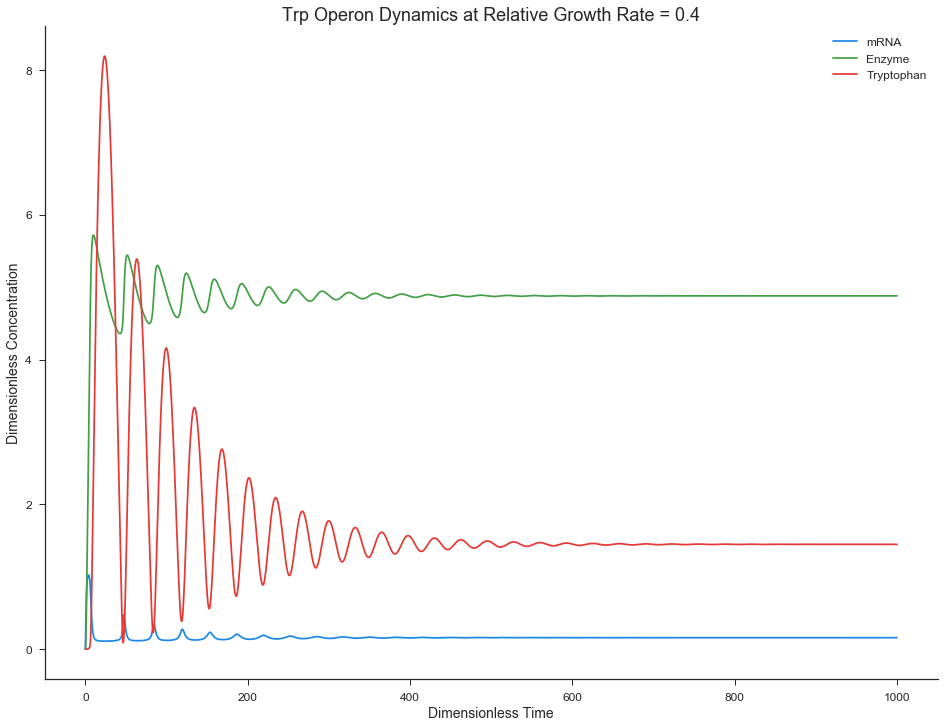

In [6]:
fig, ax = plt.subplots()
ax.plot(t, sol[:,0], label='mRNA')
ax.plot(t, sol[:,1], label='Enzyme')
ax.plot(t, sol[:,2], label='Tryptophan')
plt.xlabel('Dimensionless Time')
plt.ylabel('Dimensionless Concentration')
plt.legend(loc='best')
plt.title('Trp Operon Dynamics at Relative Growth Rate = 0.4')
sns.despine()
# fig.savefig('dynamics_uR_5-0.png')

In [7]:
def ss_concs(u_R_vec, r_val=10.0):
    x_stars = []
    y_stars = []
    z_stars = []
    for u_R in u_R_vec:
        x_star, y_star, z_star = fsolve(trp_eqs, (0, 0, 0), args=(u_R, r_val))
        x_stars.append(x_star)
        y_stars.append(y_star)
        z_stars.append(z_star)
    x_stars = np.array(x_stars)
    y_stars = np.array(y_stars)
    z_stars = np.array(z_stars)
    return x_stars, y_stars, z_stars

In [8]:
u_R_vals = np.arange(0.0, 1.0, 0.01)
x_stars_r5, y_stars_r5, z_stars_r5 = ss_concs(u_R_vals, 5.0)
x_stars_r10, y_stars_r10, z_stars_r10 = ss_concs(u_R_vals, 10.0)
x_stars_r20, y_stars_r20, z_stars_r20 = ss_concs(u_R_vals, 20.0)

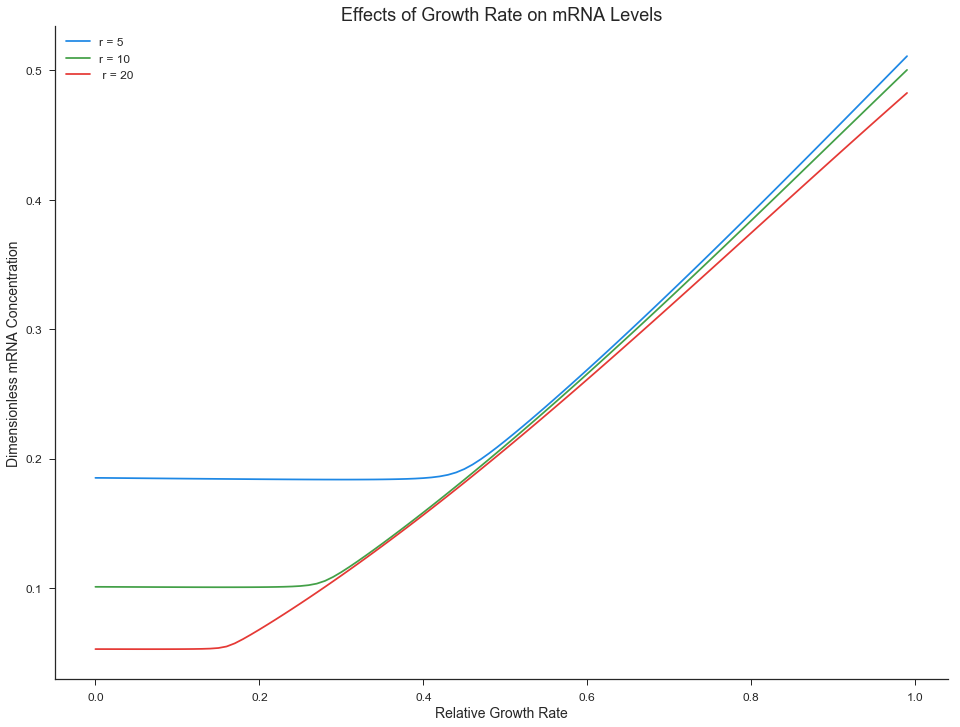

In [9]:
fig, ax = plt.subplots()
ax.plot(u_R_vals, x_stars_r5, label='r = 5')
ax.plot(u_R_vals, x_stars_r10, label='r = 10')
ax.plot(u_R_vals, x_stars_r20, label=' r = 20')
plt.xlabel('Relative Growth Rate')
plt.ylabel('Dimensionless mRNA Concentration')
plt.legend(loc='best')
plt.title('Effects of Growth Rate on mRNA Levels')
sns.despine()
fig.savefig('mRNA_u_R_comp.png')

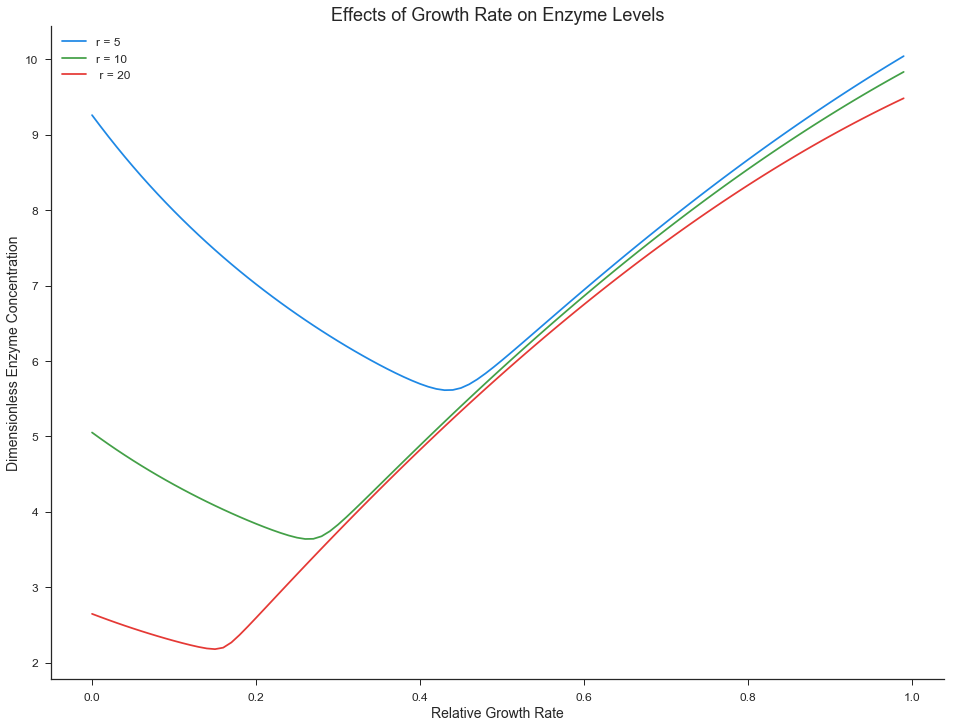

In [10]:
fig, ax = plt.subplots()
ax.plot(u_R_vals, y_stars_r5, label='r = 5')
ax.plot(u_R_vals, y_stars_r10, label='r = 10')
ax.plot(u_R_vals, y_stars_r20, label=' r = 20')
plt.xlabel('Relative Growth Rate')
plt.ylabel('Dimensionless Enzyme Concentration')
plt.legend(loc='best')
plt.title('Effects of Growth Rate on Enzyme Levels')
sns.despine()
fig.savefig('enzyme_u_R_comp.png')

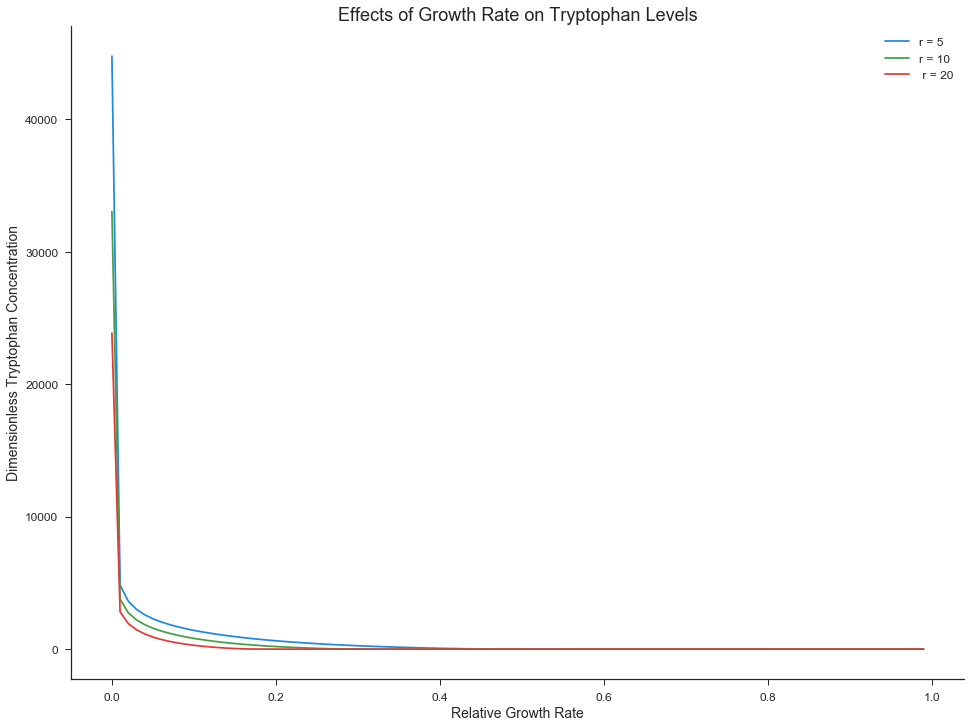

In [11]:
fig, ax = plt.subplots()
ax.plot(u_R_vals, z_stars_r5, label='r = 5')
ax.plot(u_R_vals, z_stars_r10, label='r = 10')
ax.plot(u_R_vals, z_stars_r20, label=' r = 20')
plt.xlabel('Relative Growth Rate')
plt.ylabel('Dimensionless Tryptophan Concentration')
plt.legend(loc='best')
plt.title('Effects of Growth Rate on Tryptophan Levels')
sns.despine()
fig.savefig('trp_u_R_comp.png')